In [37]:
# Import libraries
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# increase the size and quality of any plots we produce
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 150

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
# load dataframe
df = pd.read_csv("https://raw.githubusercontent.com/mellanyquiroz/DS4A-TeamProject/master/data/Merged_precovid_duringcovid_deaths_and_hospital_metrics.csv",index_col="COUNTY")
df.head()

,PRECOVID_RATES,PRECOVID_COUNTS,COVID_RATES,COVID_COUNTS,TOTAL_FAC,TOTAL_NUMBER_BEDS,COUNT_NOER_FAC,COUNT_ER_FAC,ER_BEDS,TOTALFAC_PER_POP,TOTALBEDS_PER_POP,ERFAC_PER_POP,ERBEDS_PER_POP,ERFAC_PER_AREA
COUNTY,,,,,,,,,,,,,,
Alameda,3.502,63.0,8.09,144.0,340.0,9074.0,327.0,13.0,2894.0,20.232315,539.964772,0.773588,172.212701,0.017589
Alpine,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Amador,6.556,3.0,13.07,4.0,5.0,251.0,4.0,1.0,52.0,12.362162,620.580527,2.472432,128.566484,0.001682
Butte,6.900,16.2,11.54,26.0,44.0,1387.0,41.0,3.0,467.0,22.348639,704.490045,1.523771,237.200325,0.001833
Calaveras,10.566,4.6,7.00,2.0,5.0,124.0,4.0,1.0,25.0,10.794706,267.708716,2.158941,53.973531,0.000980


In [12]:
# remove No ER facility number
df = df.drop(columns="COUNT_NOER_FAC")

In [13]:
# statistics of each column
df.describe()

,PRECOVID_RATES,PRECOVID_COUNTS,COVID_RATES,COVID_COUNTS,TOTAL_FAC,TOTAL_NUMBER_BEDS,COUNT_ER_FAC,ER_BEDS,TOTALFAC_PER_POP,TOTALBEDS_PER_POP,ERFAC_PER_POP,ERBEDS_PER_POP,ERFAC_PER_AREA
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,7.047000,40.744828,12.027586,92.913793,143.931034,3610.224138,5.741379,1266.293103,18.498336,522.331033,2.490566,189.234635,0.006969
std,4.394006,78.606841,8.527419,203.349521,499.977644,9036.753772,10.289767,2981.164055,9.637196,285.484200,3.827761,156.289132,0.028131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.258500,3.850000,6.450000,4.000000,8.250000,172.000000,1.000000,64.500000,12.447112,378.115384,0.744955,129.355708,0.000720
50%,6.222000,13.000000,10.870000,24.500000,27.500000,941.500000,2.500000,298.000000,16.176262,487.177013,1.124202,169.626388,0.001193
75%,8.615500,39.500000,15.900000,79.250000,95.500000,3333.500000,6.750000,1194.750000,22.609171,614.122250,2.394060,201.725443,0.003692
max,22.304000,457.400000,44.510000,1300.000000,3781.000000,65542.000000,72.000000,20947.000000,66.203244,1856.192962,22.413986,1176.734282,0.213246


In [14]:
# divide the dataframe into Count variables and Rate/density variables
count_df = df[["PRECOVID_COUNTS","COVID_COUNTS","TOTAL_FAC","TOTAL_NUMBER_BEDS","COUNT_ER_FAC","ER_BEDS"]]
rate_df = df[["PRECOVID_RATES","COVID_RATES","TOTALFAC_PER_POP","TOTALBEDS_PER_POP","ERFAC_PER_POP","ERBEDS_PER_POP","ERFAC_PER_AREA"]]

In [15]:
# correlations of variables in count dataframe
corr = count_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PRECOVID_COUNTS,COVID_COUNTS,TOTAL_FAC,TOTAL_NUMBER_BEDS,COUNT_ER_FAC,ER_BEDS
PRECOVID_COUNTS,1.000000,0.976495,0.828411,0.904219,0.934530,0.935051
COVID_COUNTS,0.976495,1.000000,0.891401,0.941673,0.965421,0.962937
TOTAL_FAC,0.828411,0.891401,1.000000,0.980377,0.951415,0.962089
TOTAL_NUMBER_BEDS,0.904219,0.941673,0.980377,1.000000,0.981161,0.994586
COUNT_ER_FAC,0.934530,0.965421,0.951415,0.981161,1.000000,0.988460
ER_BEDS,0.935051,0.962937,0.962089,0.994586,0.988460,1.000000


In [35]:
# correlations of variables in rate dataframe
corr = rate_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PRECOVID_RATES,COVID_RATES,TOTALFAC_PER_POP,TOTALBEDS_PER_POP,ERFAC_PER_POP,ERBEDS_PER_POP,ERFAC_PER_AREA
PRECOVID_RATES,1.000000,0.559893,0.175639,-0.022900,0.243367,0.108534,0.185207
COVID_RATES,0.559893,1.000000,0.030979,0.025531,-0.146572,-0.078648,0.507841
TOTALFAC_PER_POP,0.175639,0.030979,1.000000,0.483859,0.181574,0.074273,-0.105590
TOTALBEDS_PER_POP,-0.022900,0.025531,0.483859,1.000000,0.182702,0.388887,0.031583
ERFAC_PER_POP,0.243367,-0.146572,0.181574,0.182702,1.000000,0.793522,-0.088054
ERBEDS_PER_POP,0.108534,-0.078648,0.074273,0.388887,0.793522,1.000000,0.098817
ERFAC_PER_AREA,0.185207,0.507841,-0.105590,0.031583,-0.088054,0.098817,1.000000


In [33]:
# function to plot a matrix of scatterplot
def plotting(df):
    g = sns.PairGrid(df)
    g.map(sns.scatterplot)

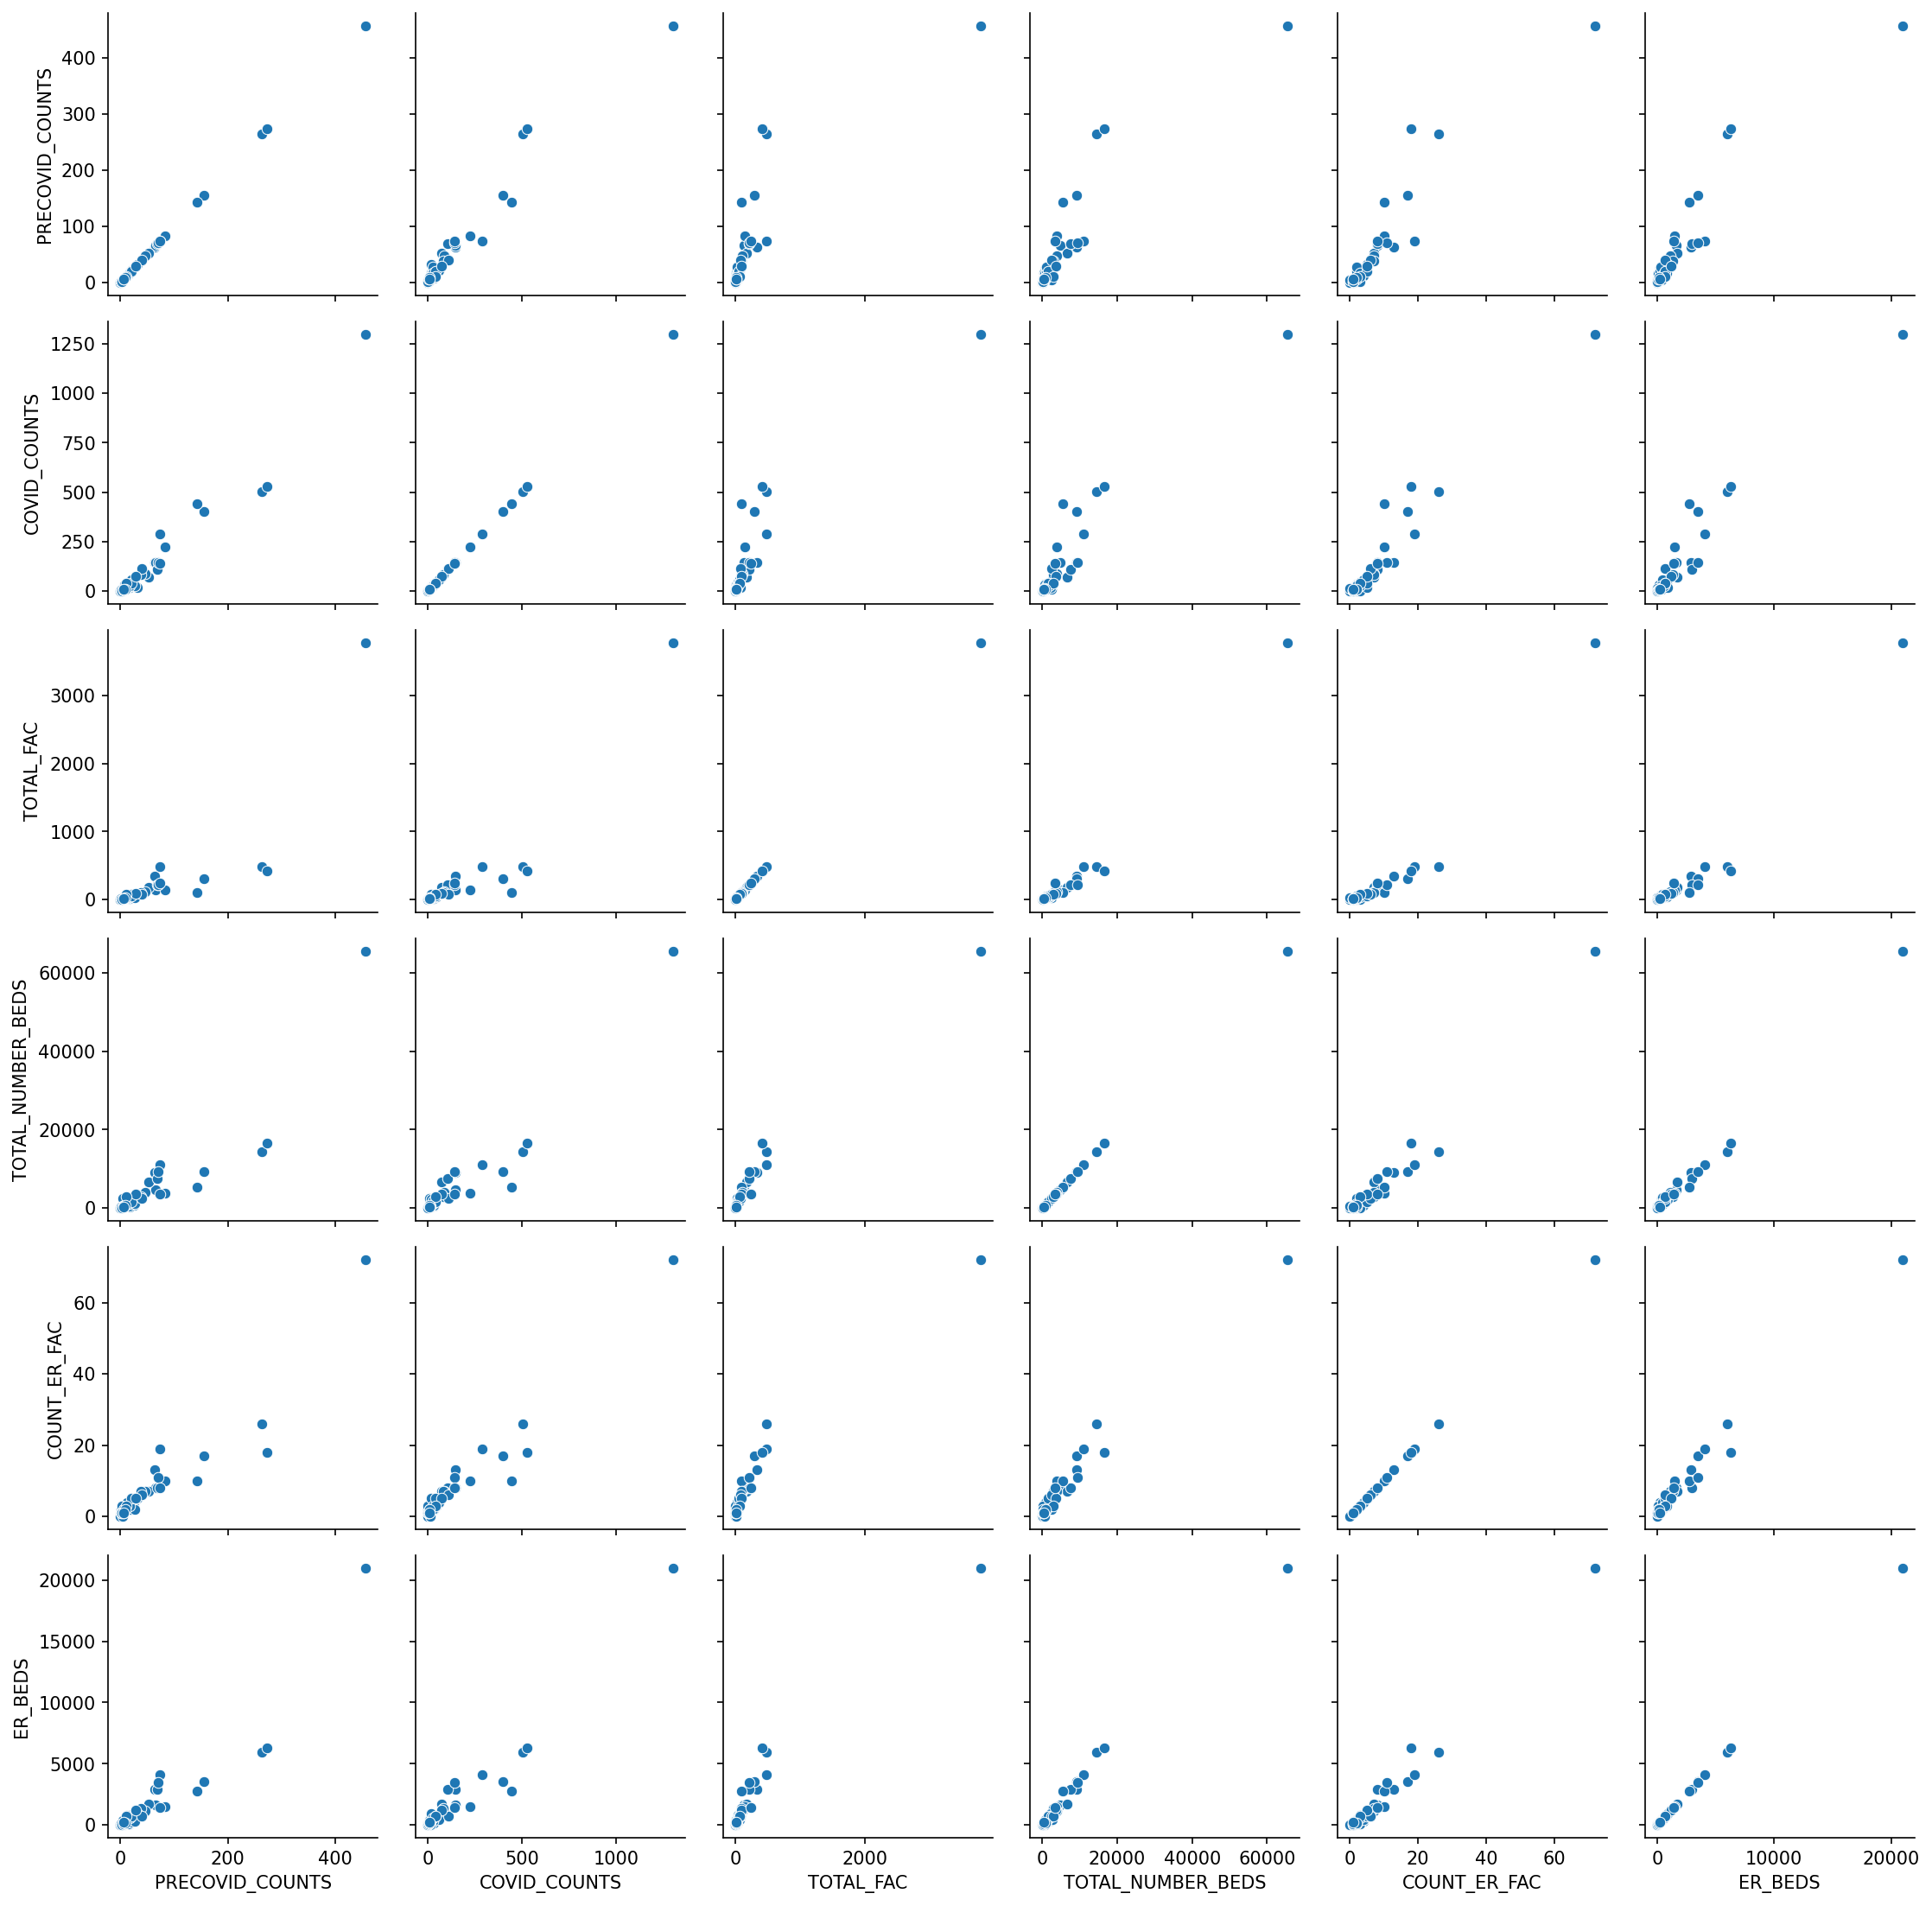

In [34]:
plotting(count_df)

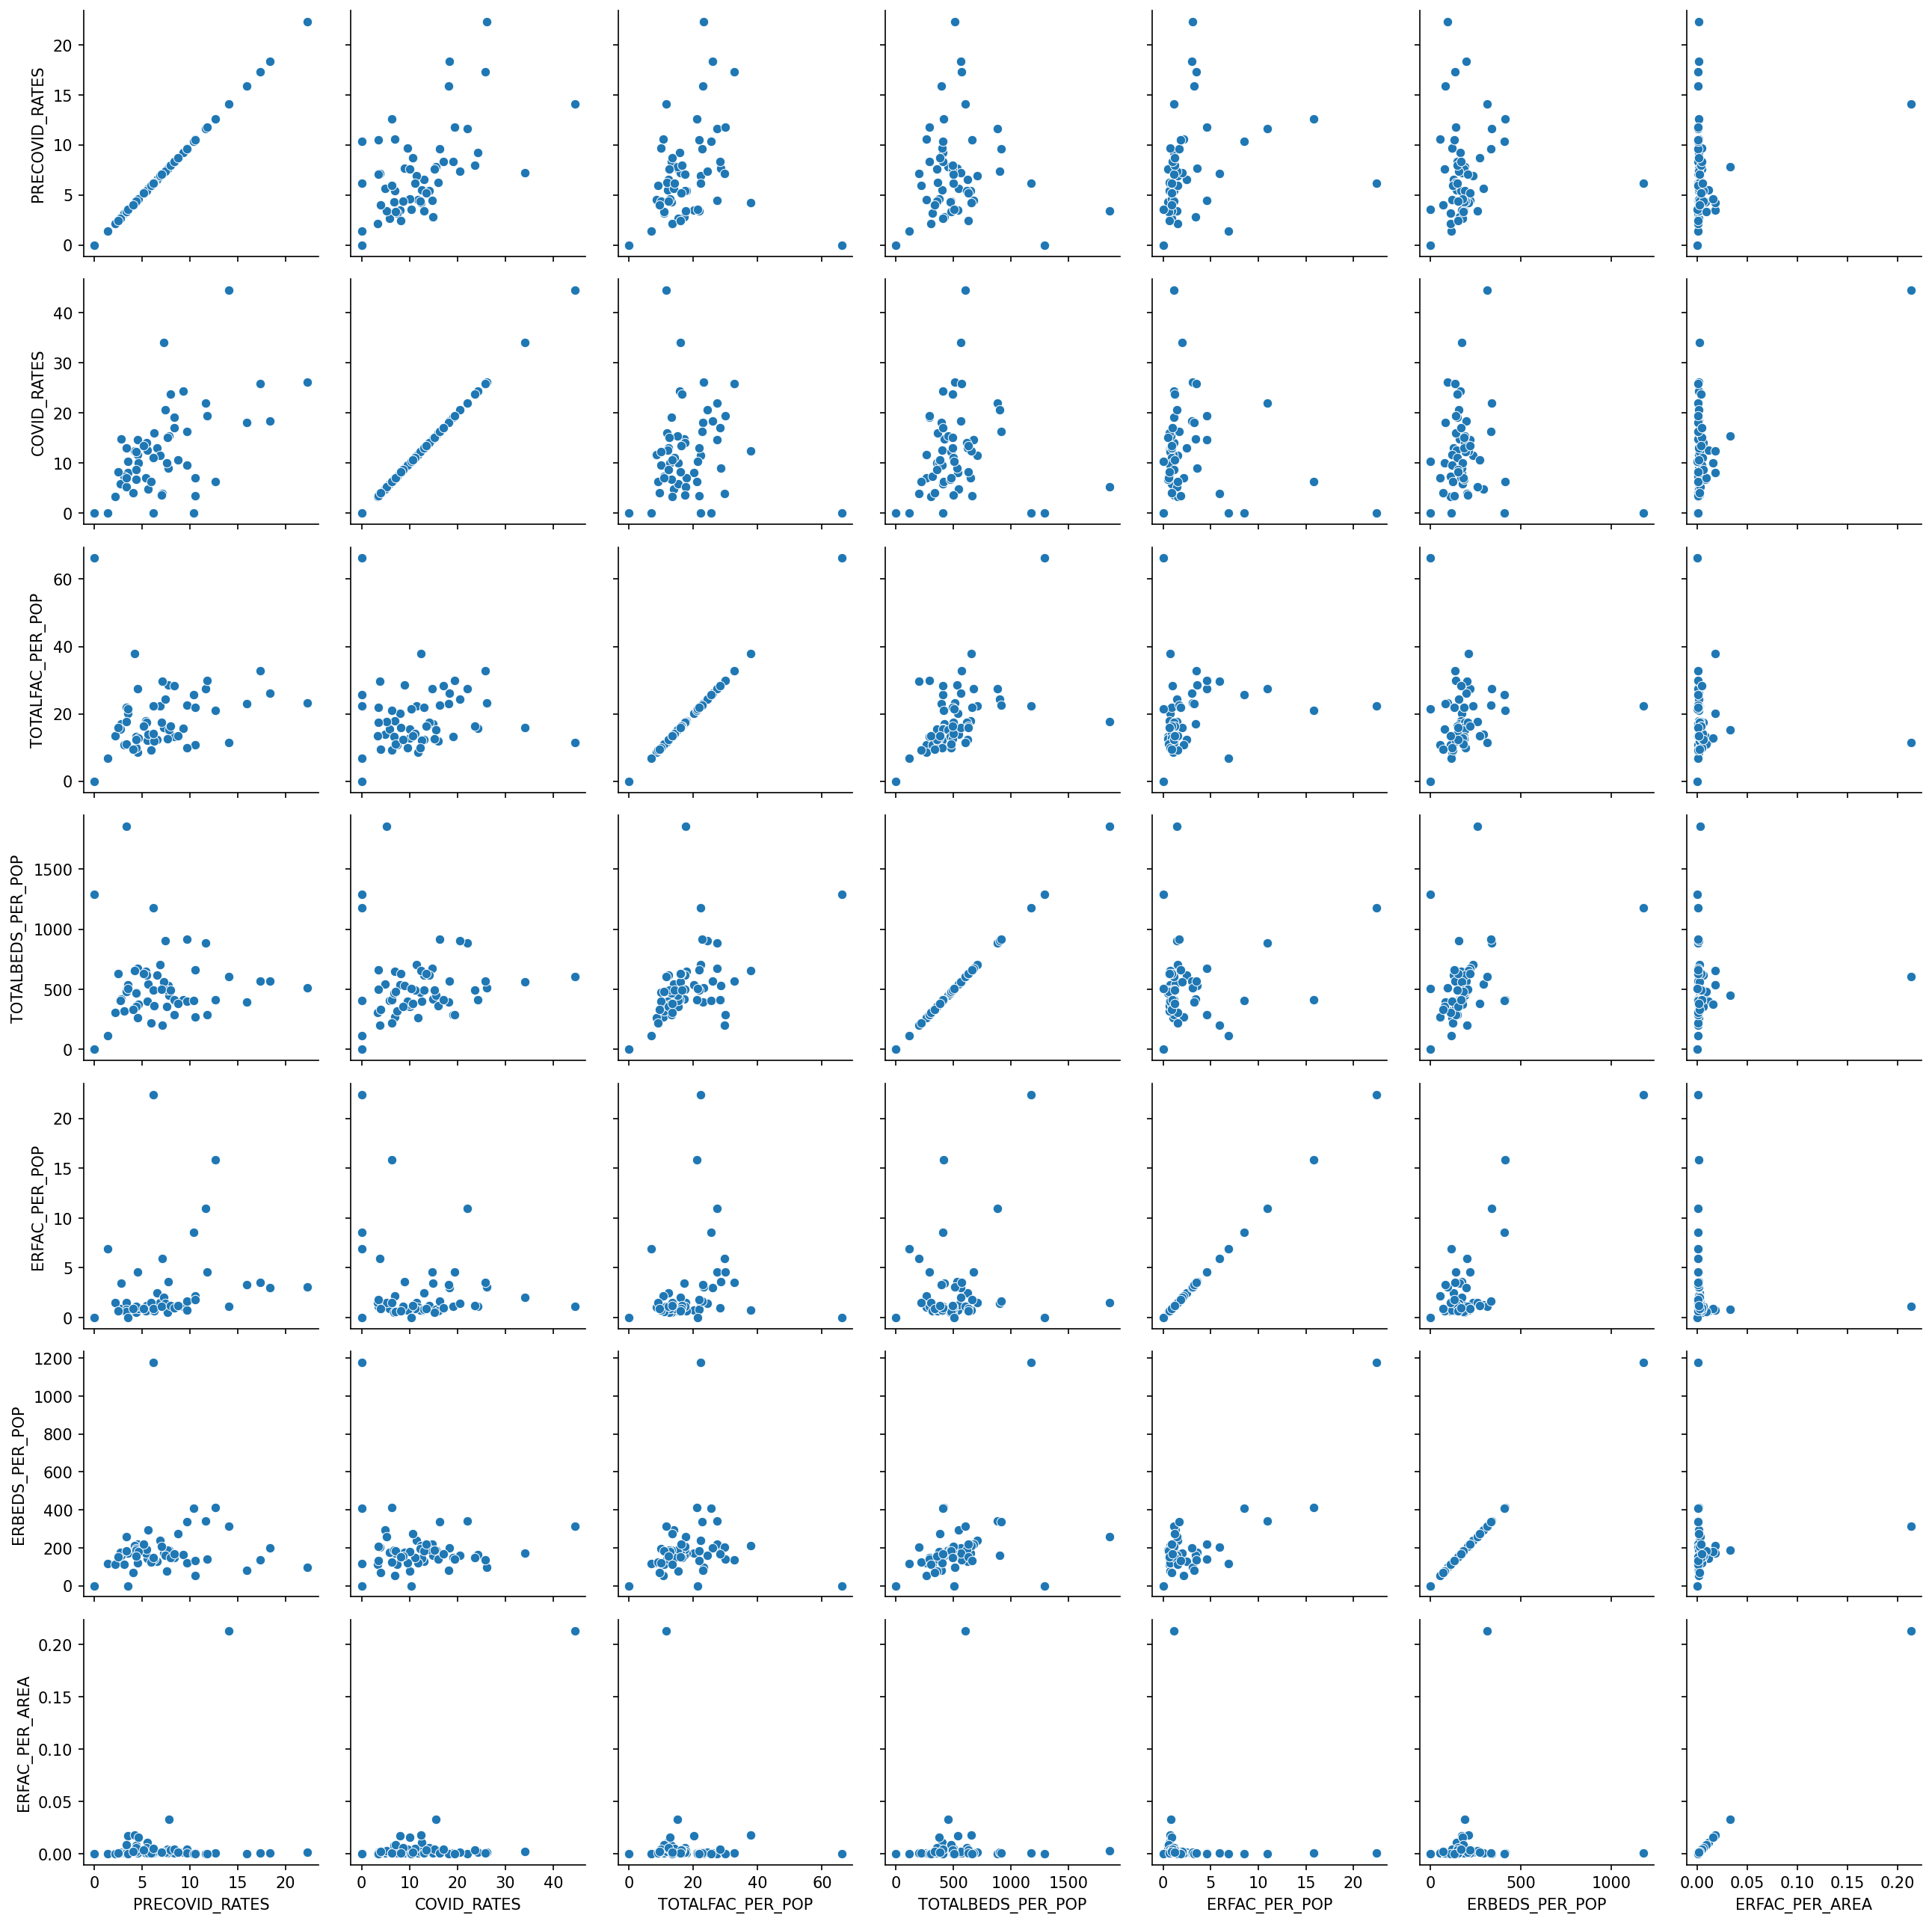

In [28]:
plotting(rate_df)

## Linear Regression on death rates

In [42]:
# Build a function to run a linear regression and plot it using variables in a dataset
def linear_regression(dataframe,variable_x,variable_y):
    ''' This function takes a dataframe and its variables,
    plot a scatter chart, then fit the data in a linear regression model
    Input: dataframe, x variable, y variable
    Output: a scatter plot, regression score, a scatter of predicted value '''

    # plot the data on a scatter chart
    sns.lmplot(x=variable_x,y=variable_y,data=dataframe,order=2,ci=None)

    # run linear regression
    X = np.array(dataframe[variable_x]).reshape(-1,1)
    y = np.array(dataframe[variable_y]).reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    score = regr.score(X_test, y_test)
    print("Regression score is %f." % score)

    # plot the predicted data
    y_pred = regr.predict(X_test)
    plt.scatter(X_test, y_test, color ='r')
    plt.plot(X_test, y_pred, color ='b')
    plt.show()

Regression score is 0.070234.


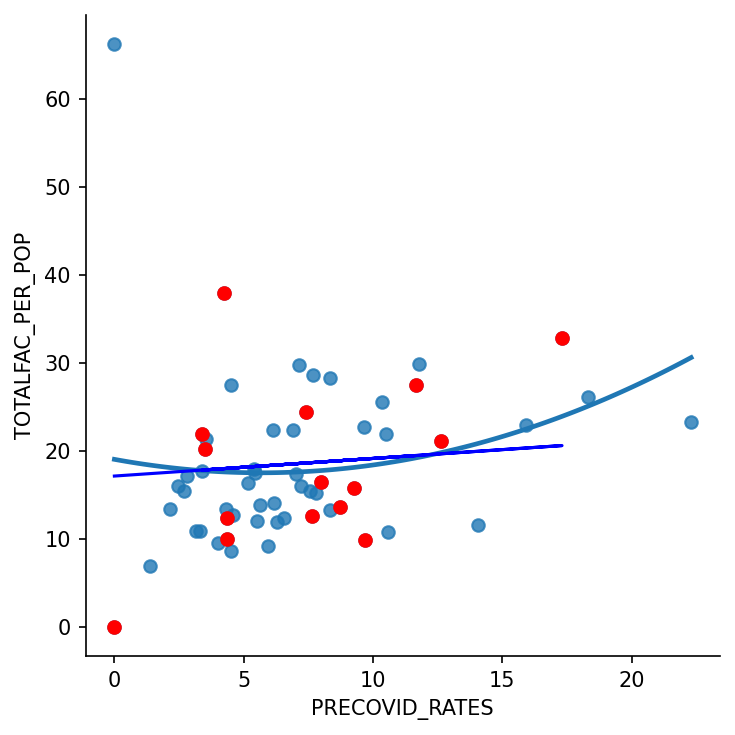

In [43]:
linear_regression(rate_df,"PRECOVID_RATES","TOTALFAC_PER_POP")

Regression score is -0.238097.


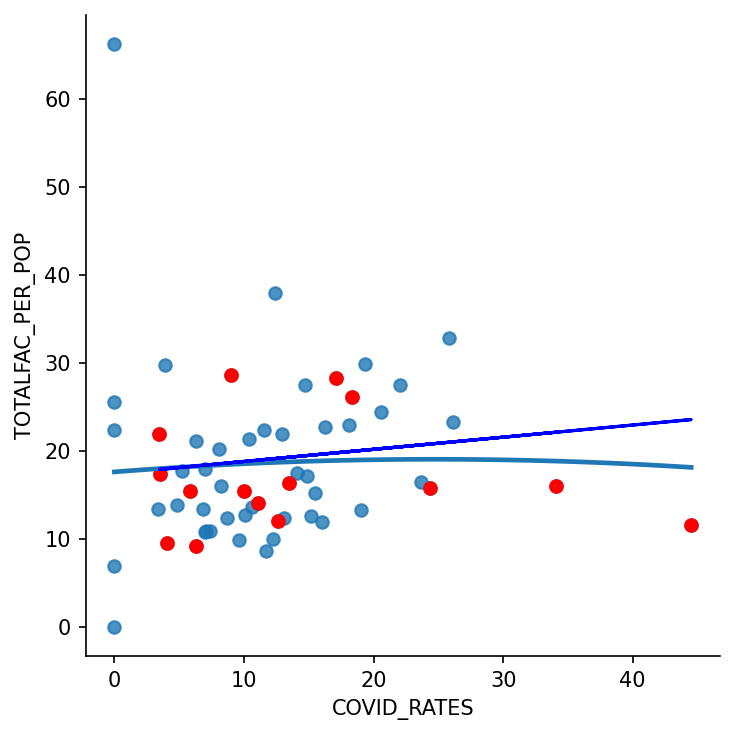

In [46]:
linear_regression(rate_df,"COVID_RATES","TOTALFAC_PER_POP")

Regression score is -0.043462.


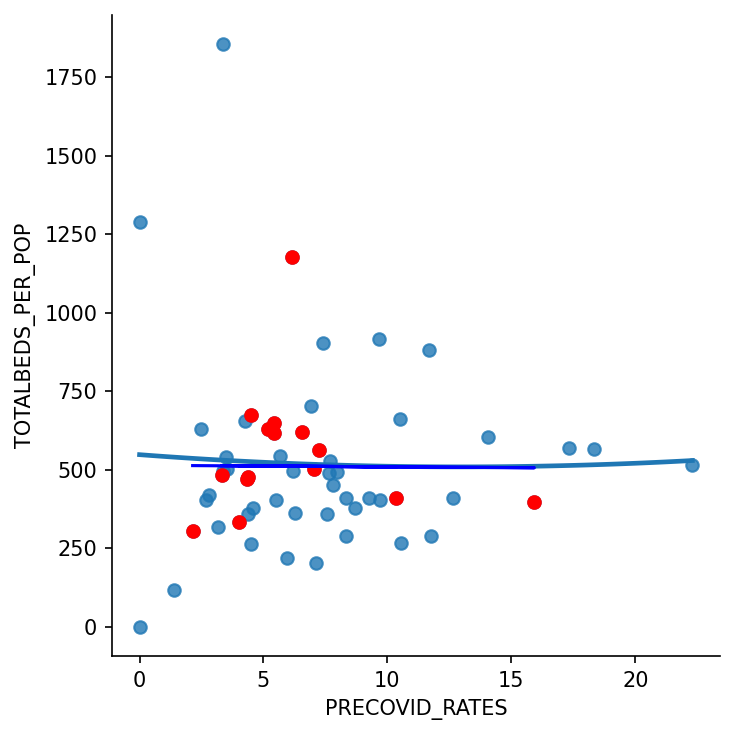

In [44]:
linear_regression(rate_df,"PRECOVID_RATES","TOTALBEDS_PER_POP")

Regression score is -0.001382.


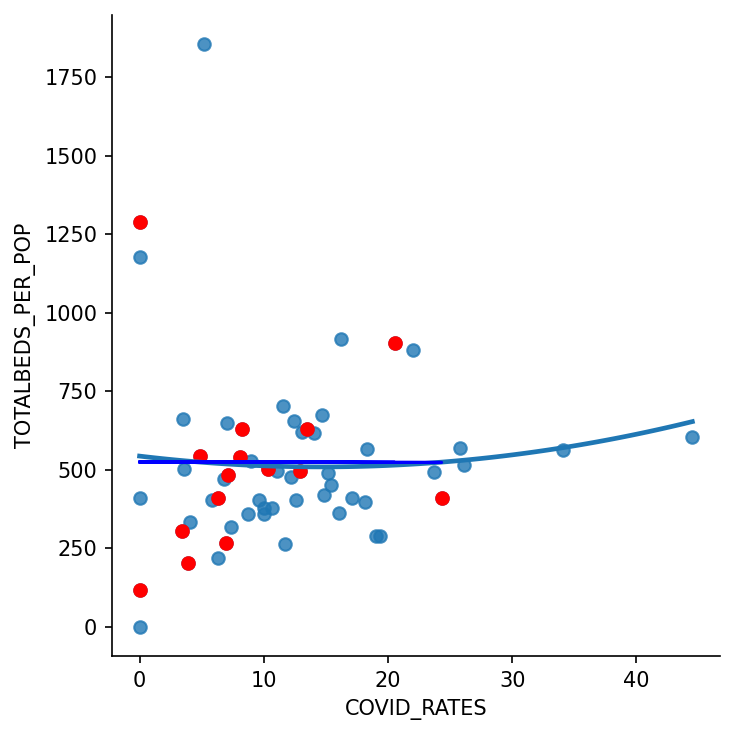

In [47]:
linear_regression(rate_df,"COVID_RATES","TOTALBEDS_PER_POP")

Regression score is -0.097218.


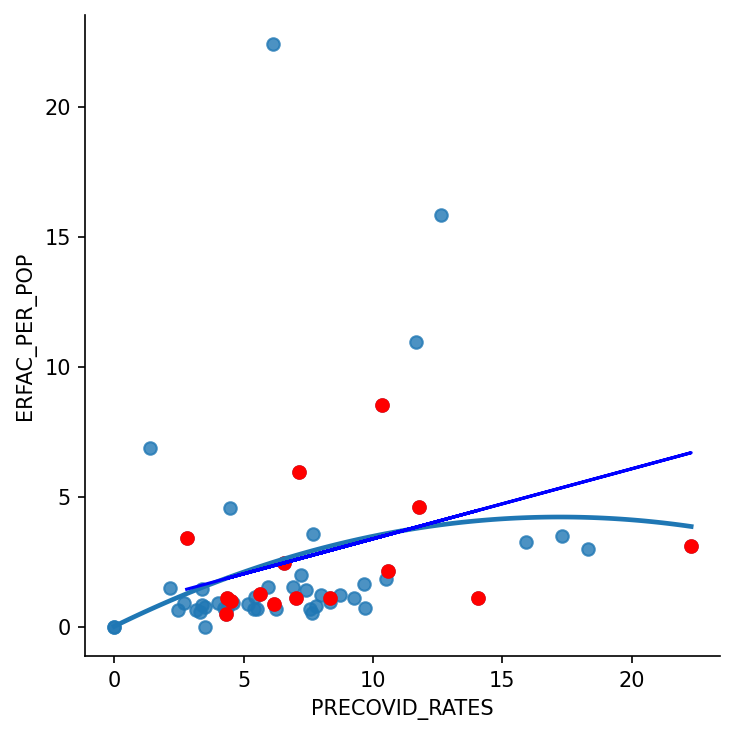

In [48]:
linear_regression(rate_df,"PRECOVID_RATES","ERFAC_PER_POP")

Regression score is -4.435137.


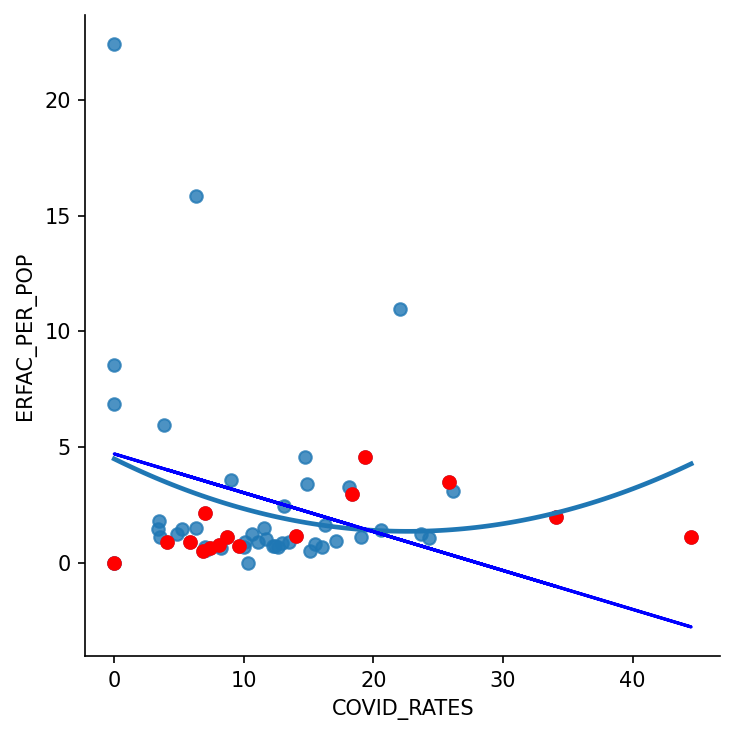

In [50]:
linear_regression(rate_df,"COVID_RATES","ERFAC_PER_POP")

Regression score is -5.383733.


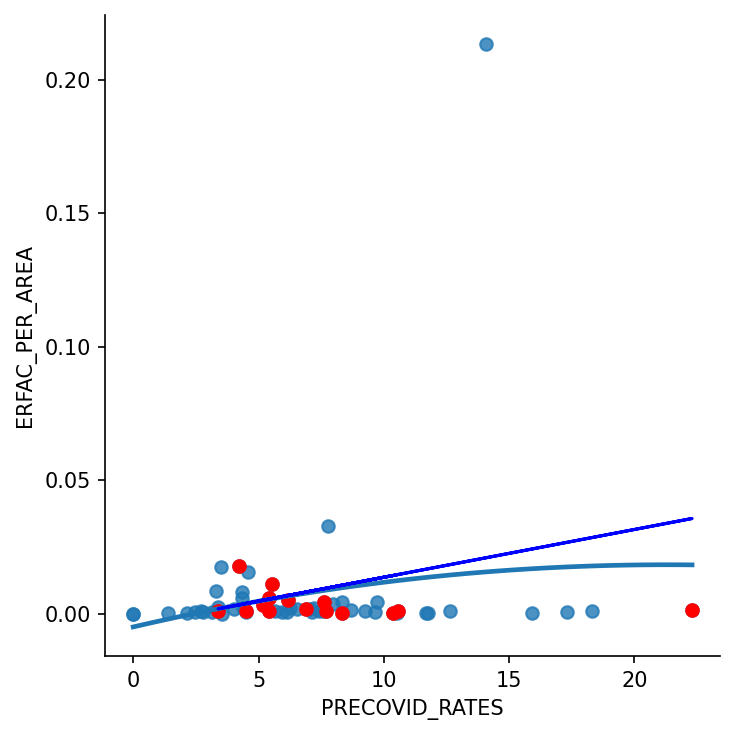

In [51]:
linear_regression(rate_df,"PRECOVID_RATES","ERFAC_PER_AREA")

Regression score is -0.043837.


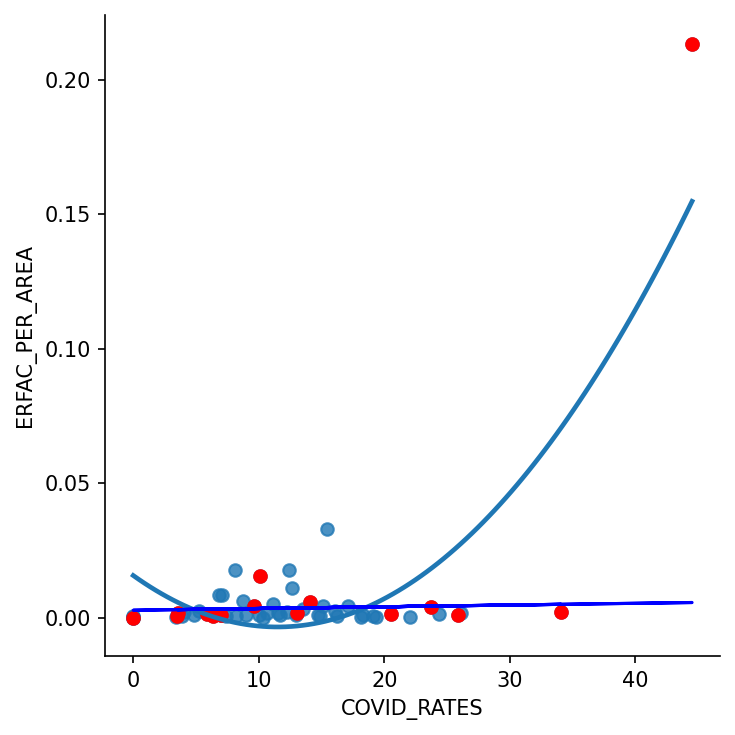

In [52]:
linear_regression(rate_df,"COVID_RATES","ERFAC_PER_AREA")